# Ride Share Analysis

You have files that contain the data retrieved with queries from the previous tasks.

/datasets/project_sql_result_01.csv — the result of the first query. It contains the following data:
company_name: taxi company name
trips_amount: the number of rides for each taxi company on November 15-16, 2017.

/datasets/project_sql_result_04.csv — the result of the second query. It contains the following data:
dropoff_location_name: Chicago neighborhoods where rides ended
average_trips: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to: import the files, study the data they contain, make sure the data types are correct, identify the top 10 neighborhoods in terms of drop-offs, make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs, and draw conclusions based on each graph and explain the results

## Exploratory Data Analysis

### Import and Study Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Import data
taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
rides = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
#iDsplay taxi table
display(taxi.head())
display(taxi.info())
taxi.isnull().sum()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

company_name    0
trips_amount    0
dtype: int64

In [4]:
#Display rides table
display(rides.head())
display(rides.info())
rides.isnull().sum()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

dropoff_location_name    0
average_trips            0
dtype: int64

In [5]:
display(taxi.duplicated().sum())
rides.duplicated().sum()

0

0

In [6]:
#Change data types
rides['average_trips'] = rides['average_trips'].astype(int)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


The taxi table has 64 entries and two columns, company_name and trips_amount. Company_name has a data type object and trips_amount has a data type integer. The rides table has 94 entries and two columns, dropoff_location_name and average_trips. Dropoff_location_name has a data type object and average_trips has a data type float. We changed the data type to integer in the average trips column of the rides table. There is no missing entries or duplicate data.

### Identify the Top Ten Neighborhoods in Terms of Drop-offs

In [7]:
#Top 10 neighborhoods
top_neighborhoods = rides.groupby('dropoff_location_name')['average_trips'].sum().reset_index().sort_values(by = 'average_trips',  ascending = False).head(10)

display(top_neighborhoods)

,dropoff_location_name,average_trips
50,Loop,10727
68,River North,9523
78,Streeterville,6664
87,West Loop,5163
63,O'Hare,2546
44,Lake View,2420
35,Grant Park,2068
56,Museum Campus,1510
32,Gold Coast,1364
74,Sheffield & DePaul,1259


Text(0.5, 1.0, 'Top Ten Neighborhoods per Number of Drop-offs')

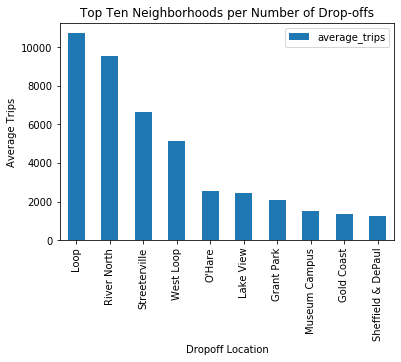

In [8]:
#Plot top ten neighborhoods
top_neighborhoods.plot(kind = 'bar', x = 'dropoff_location_name', y = 'average_trips')
plt.xlabel('Dropoff Location')
plt.ylabel('Average Trips')
plt.title('Top Ten Neighborhoods per Number of Drop-offs')

,company_name,trips_amount
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasing,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299


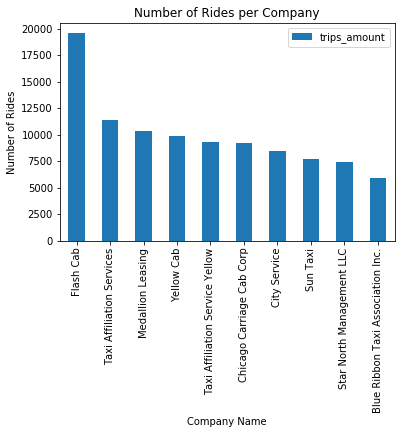

In [9]:
#Top taxi companies
top_taxi = taxi.groupby('company_name')['trips_amount'].sum().reset_index().sort_values(by = 'trips_amount',  ascending = False).head(10)
#Plot top taxi companies
top_taxi.plot(kind = 'bar', x = 'company_name', y = 'trips_amount')
plt.xlabel('Company Name')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Company')
top_taxi.head()

We created a bargaph for the top ten taxi companies with the highest number of trips. the x-axis is company name and the y-axis is number of rides. The title of the graph is 'Number of Rides per Company'. Flash Cab has the most trips per company at 19558. The second company with the highest number of rides is Taxi Affiliation Services with only 11422.

## Testing Hypothesis

You have a file obtained from the previous task.

/datasets/project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
start_ts
pickup date and time
weather_conditions
weather conditions at the moment the ride started
duration_seconds
ride duration in seconds

Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
Decide where to set the significance level (alpha) on your own.
Explain:
how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why

### Import and Study Data

In [10]:
#Import O'hare data
ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

display(ohare.head())
display(ohare.info())

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

In [11]:
#Find duplicates
display(ohare.duplicated().sum())
#Drop duplicates
ohare = ohare.drop_duplicates().reset_index(drop = True)
display(ohare.duplicated().sum())

197

0

In [12]:
#Find missing values
ohare.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [13]:
#Change data types
ohare['start_ts'] = pd.to_datetime(ohare['start_ts'])
ohare['duration_seconds'] = ohare['duration_seconds'].astype(int)
ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
start_ts              871 non-null datetime64[ns]
weather_conditions    871 non-null object
duration_seconds      871 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.5+ KB


The table ohare has 1068 entries and three columns: start_ts, weather_conditions, and duration_seconds. We changed the data types of the columns start_ts to datetime and duration_seconds to int. We removed 197 duplicate rows. There are no missing values.

### Test Hypothesis

In [14]:
#Saturdays with bad weather
saturday_bad_weather = ohare[(ohare['start_ts'].dt.weekday==5)&(ohare['weather_conditions']=='Bad')]
display(saturday_bad_weather.head())

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969
30,2017-11-18 12:00:00,Bad,1980
34,2017-11-04 17:00:00,Bad,2460
51,2017-11-04 16:00:00,Bad,2760
52,2017-11-18 12:00:00,Bad,2460


In [15]:
#Perform a t-test
alpha = 0.5
results = st.ttest_ind(ohare['duration_seconds'], saturday_bad_weather['duration_seconds'], equal_var = False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
        print('We reject the null hypothesis')
else:
        print("We can't reject the null hypothesis")
        
print("The average duration of rides to O'Hare Airport:", ohare['duration_seconds'].mean().round(2))
print("The average duration of rides to O'Hare Airport on Saturday with rain:", saturday_bad_weather['duration_seconds'].mean().round(2))

p-value:  5.814818471518212e-06
We reject the null hypothesis
The average duration of rides to O'Hare Airport: 2096.31
The average duration of rides to O'Hare Airport on Saturday with rain: 2409.23


We test the hypothesis that the avearage duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. To do so we used an independent sample t-test to compare the average duration of rides to ohare airport on regular days compared to rides on rainy Saturdays.

The null hypothesis H0, states the average duration of rides does not change on rainy Saturdays. The alternative hypothesis H1,states that the duration of rides does change on rainy Saturdays.

The value obtained from the t-test shows that we can reject our null hypothesis. The average duration of rides does change on rainy Saturdays.

## Conclusion

The data we obtained had no missing values but the o'hare table had 197 duplicated values. Based on the data from the top ten neighborhoods in terms of drop-offs and the top ten cab companies, the top neighborhood is Loop and the top cab company is Flash Cab. 

The average duration of rides from the neighborhood Loop to O'Hare International Airport changes on rainy Saturdays.